### Clustering with PCA and SOM
#### Author: Christian Berdejo Sánchez

Using the [Human Activity Recognition dataset from Smartphones](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones), we conduct a dimensionality reduction study with **PCA**.

Based on the **principal components** selected after analyzing the **cumulative variance ratios (CVRs)**, we create a new dataset with these components and apply multiple clustering techniques, including **Hierarchical Clustering**, **K-Means**, and **Self-Organizing Maps (SOMs)**.


In [ ]:
# Install dependencies (only needed if not already installed)
!pip install numpy pandas scikit-learn matplotlib seaborn scipy minisom

In [1]:
import pandas as pd
# Load data
X_train = pd.read_csv('../data/train/X_train.txt', delim_whitespace=True, header=None)
X_test = pd.read_csv('../data/test/X_test.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('../data/train/y_train.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('../data/test/y_test.txt', delim_whitespace=True, header=None)
# Combine train and test sets
X = pd.concat([X_train, X_test], ignore_index=True)
y = pd.concat([y_train, y_test], ignore_index=True) 


/tmp/ipykernel_1554/556084168.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('../data/train/X_train.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_1554/556084168.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('../data/test/X_test.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_1554/556084168.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv('../data/train/y_train.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_1554/556084168.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_csv('

In [2]:
X.shape

(10299, 561)

In [3]:
X

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [4]:
from sklearn.preprocessing import StandardScaler
standardized = StandardScaler()
standardized.fit(X)
X_scaled = standardized.transform(X)


## 1 - PCA

We reduce the dimensionality of the data to 2 principal components and visualize it.

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components =2)
X_pca = pca.fit_transform(X_scaled)

In [7]:
X_pca.shape

(10299, 2)

I define this method to use ir later on to compare the results with the real values

In [8]:
def plot_real_labels(X_pca):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], s=60, c=y[0], cmap='viridis')
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
    ax.set_title('PCA of Human Activity Recognition Dataset (Real Labels)')
    plt.show()


Now, it is shown the 2 main principal components after PCA

/tmp/ipykernel_1554/2201537369.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], s=60, color="blue", cmap='viridis')
/home/cbs/projects/clustering_comparison/.venv/lib/python3.10/site-packages/matplotlib/collections.py:1112: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


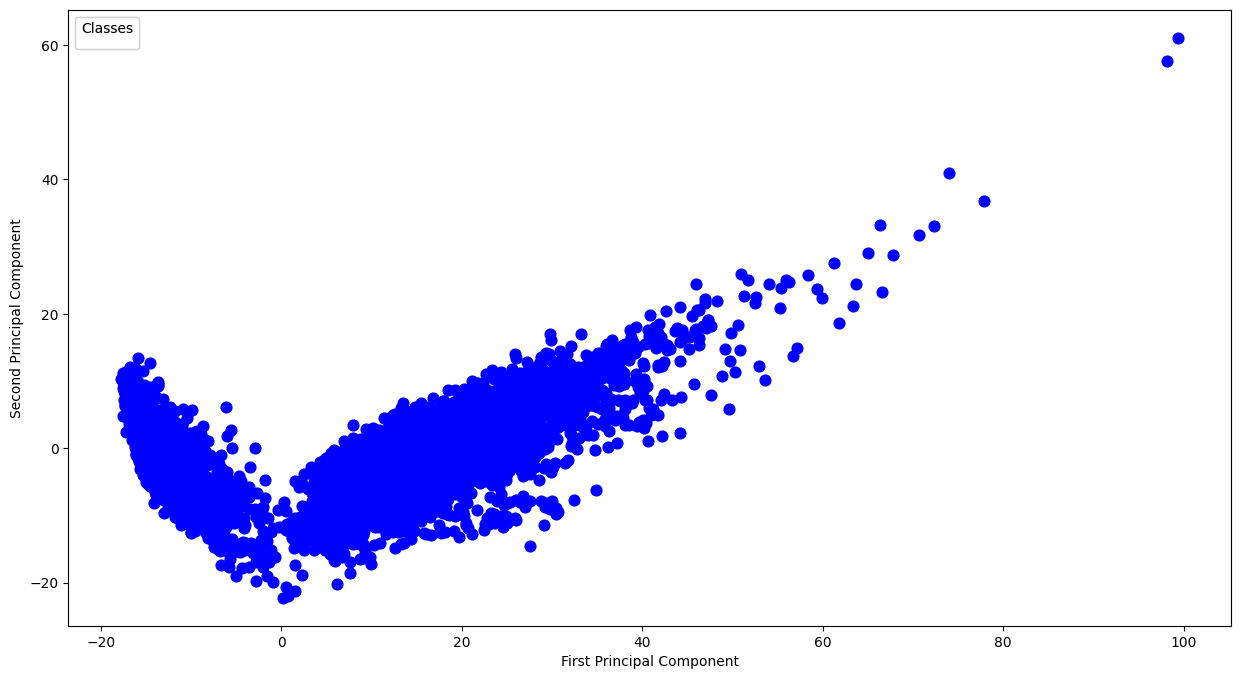

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], s=60, color="blue", cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
plt.show()


We could now visualize the significance of each variable like this:


In [10]:
X_df = pd.DataFrame(X_scaled)
df_pc = pd.DataFrame(pca.components_, columns=X_df.columns)

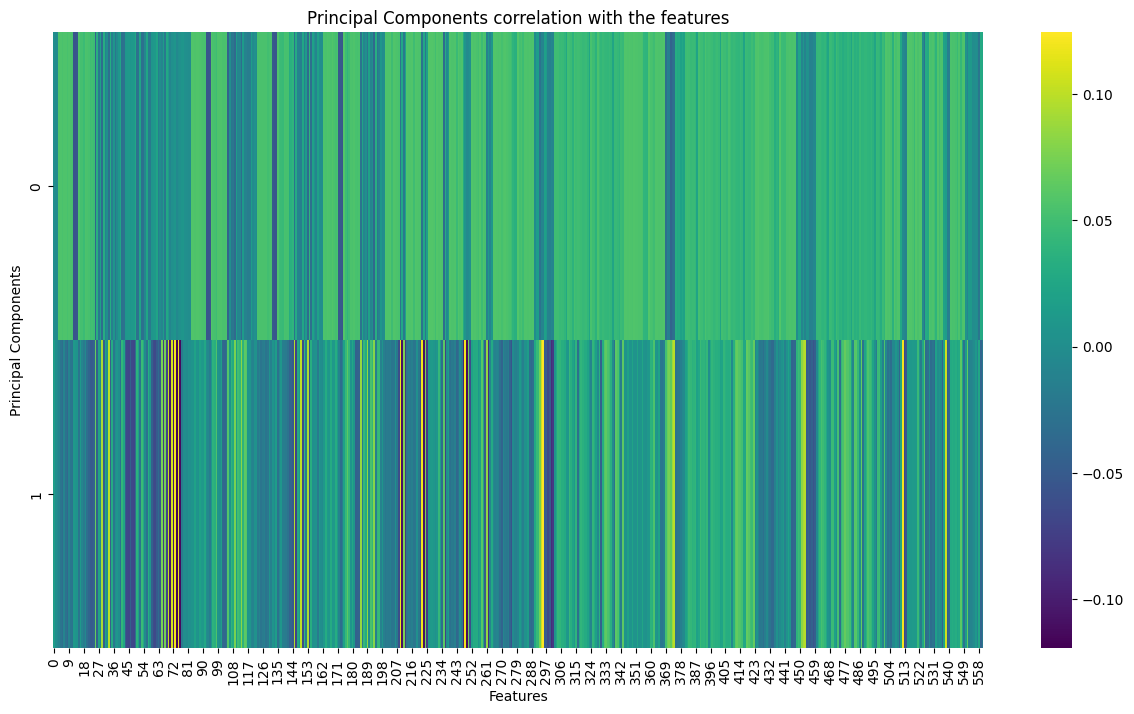

In [11]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_pc, cmap='viridis')
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()

## 2 - Clustering


### K-Means

Elbow method

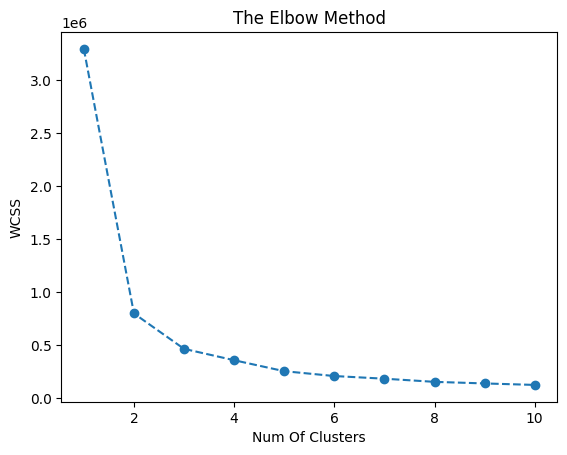

In [12]:
from sklearn.cluster import KMeans

WCSS =  [ ]
for i in range(1, 11):
    km = KMeans(n_clusters= i, init='k-means++', random_state=0)
    km.fit(X_pca)
    WCSS.append(km.inertia_)

plt.plot(range(1,11),WCSS, marker='o',linestyle='dashed')
plt.title('The Elbow Method')
plt.xlabel('Num Of Clusters')
plt.ylabel('WCSS')
plt.show()

It seems that the optimum number of clusters is 2, we can make sure using silhouette score

In [13]:
from sklearn.metrics import silhouette_score

for k in [2,3,4]:
    clusterer = KMeans(n_clusters=k, random_state=10)
    labels = clusterer.fit_predict(X_scaled)

    sil_score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for k={k}: {sil_score:.4f}")


Silhouette Score for k=2: 0.3937
Silhouette Score for k=3: 0.3155
Silhouette Score for k=4: 0.1505


We can see that the silhouette score is higher for 'k=2', therefore we plot it

In [14]:
clusterer = KMeans(n_clusters=2, random_state=10)
y_mean = clusterer.fit_predict(X_pca)

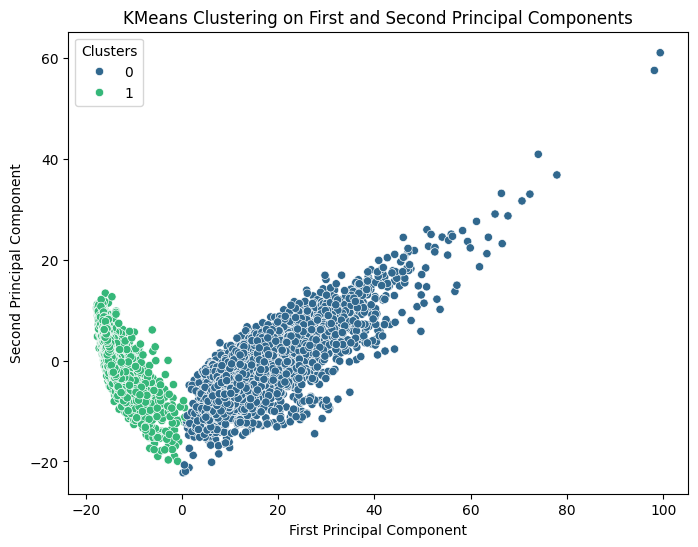

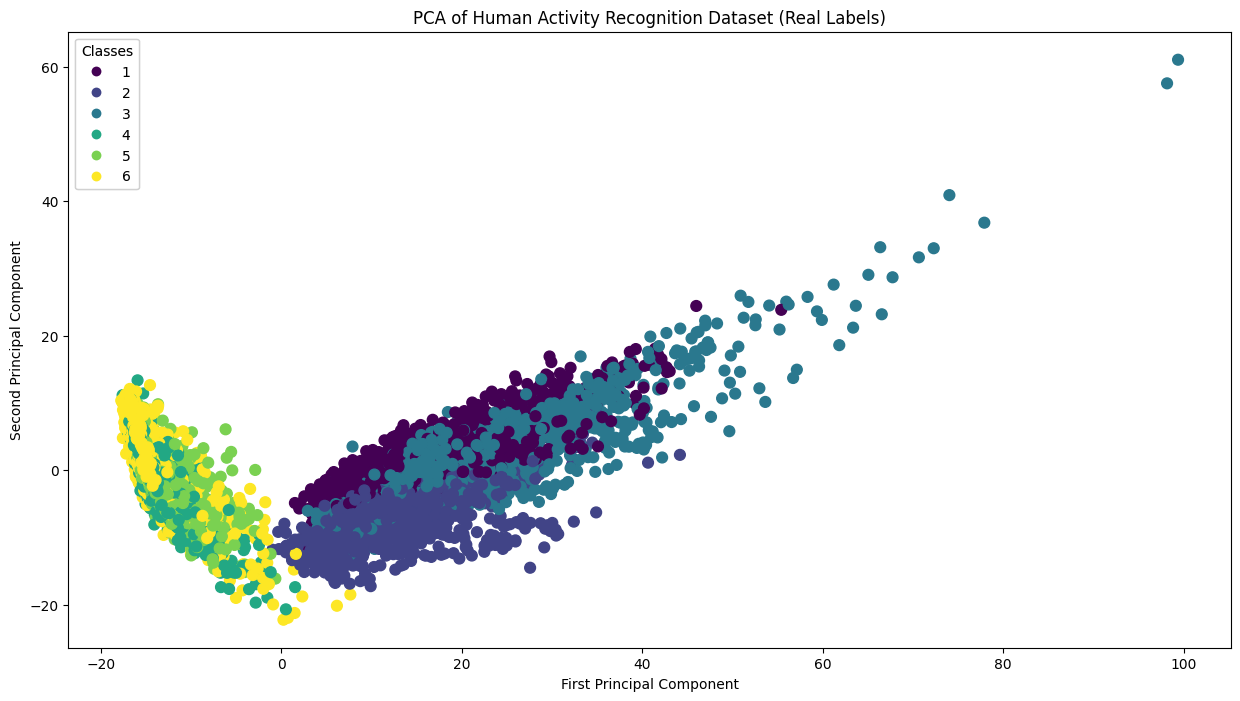

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_mean, palette='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering on First and Second Principal Components')
plt.legend(title='Clusters')                                                                                                                                                            
plt.show() 



plot_real_labels(X_pca)


Although the Forest Type Mapping dataset contains six real classes, the clustering performed with K-Means on the first two principal components does not recover this ground-truth structure. Instead, K-Means finds a clear separation into two dominant groups, which does not align with the actual labels.

This reveals an important insight:

PCA combined with unsupervised clustering can sometimes expose hidden patterns in the data that are different from the labeled categories.

In this case, the two main groups may correspond to broader divisions in the feature space (e.g., vegetation types with similar spectral signatures) rather than the specific forest classes.

Therefore, while K-Means is not effective at reproducing the six known clusters, it still highlights a meaningful latent structure in the dataset — a division into two large clusters — that could be useful for exploratory analysis or as a preprocessing step for further modeling.

### Agglomerative Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram


def agglo_silhouette_sweep(X_pca, n_range=range(2, 11),
                           linkages=('ward', 'complete', 'average')):
    rows = []
    for link in linkages:
        for n in n_range:
            try:
                labels = AgglomerativeClustering(n_clusters=n, linkage=link).fit_predict(X_pca)
                score = silhouette_score(X_pca, labels) if len(np.unique(labels)) > 1 else np.nan
            except Exception:
                score = np.nan
            rows.append({"linkage": link, "n_clusters": n, "silhouette": score})
    df = pd.DataFrame(rows)
    print("\nSilhouette table (rows=n_clusters, cols=linkage):\n")
    print(df.pivot(index='n_clusters', columns='linkage', values='silhouette').round(3))
    return df

def plot_agglomerative_clustering(X_pca, n_clusters=6):
  
    
    linkages = ['ward', 'single', 'complete', 'average']
    
    for link in linkages:
        # --- Clustering ---
        # Fit Agglomerative Clustering with specified linkage
        agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=link)
        labels = agglo.fit_predict(X_pca)
        
        # --- Robust color mapping (dynamic) ---
        # Build a palette with as many colors as unique labels
        uniq = np.unique(labels)
        palette = sns.color_palette("tab10", n_colors=len(uniq))
        color_map = {lab: col for lab, col in zip(uniq, palette)}
        point_colors = [color_map[lab] for lab in labels]  # safe lookup
        
        print(f"Linkage: {link} | clusters found: {len(uniq)}")
        
        # --- Scatter Plot ---
        # Visualize clusters on first two principal components
        plt.figure(figsize=(9, 6))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=point_colors, alpha=0.8, s=35)
        
        # Build a legend with unique labels
        handles = [plt.Line2D([0], [0], marker='o', linestyle='', 
                             color=color_map[lab], label=str(lab)) 
                  for lab in uniq]
        plt.legend(handles=handles, title="Clusters", loc="best")
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        plt.title(f'Agglomerative with linkage = {link} for {n_clusters} clusters' )
        plt.tight_layout()
        plt.show()
        
        # --- Dendrogram (scipy) ---
        # scipy.linkage method names match the strings in linkages
        Z = linkage(X_pca, method=link)  # Ward requires Euclidean (default)
        
        plt.figure(figsize=(11, 7))
        dendrogram(Z, no_labels=True, color_threshold=None)
        plt.title(f'Dendrogram (linkage = {link})')
        plt.xlabel('Samples')
        plt.ylabel('Distance')
        plt.tight_layout()
        plt.show()

In [ ]:

# 1) Calculate silhouettes
scores = agglo_silhouette_sweep(X_pca, n_range=range(2, 11),
                                linkages=('ward', 'single', 'complete','average'))





Silhouette table (rows=n_clusters, cols=linkage):

linkage     average  complete  single   ward
n_clusters                                  
2             0.678     0.641   0.812  0.701
3             0.658     0.495   0.739  0.556
4             0.692     0.493   0.737  0.566
5             0.646     0.601   0.695  0.417
6             0.531     0.599   0.695  0.387
7             0.530     0.598   0.686  0.401
8             0.509     0.479   0.597  0.403
9             0.515     0.444   0.596  0.402
10            0.501     0.438   0.597  0.398


Linkage: ward | clusters found: 2


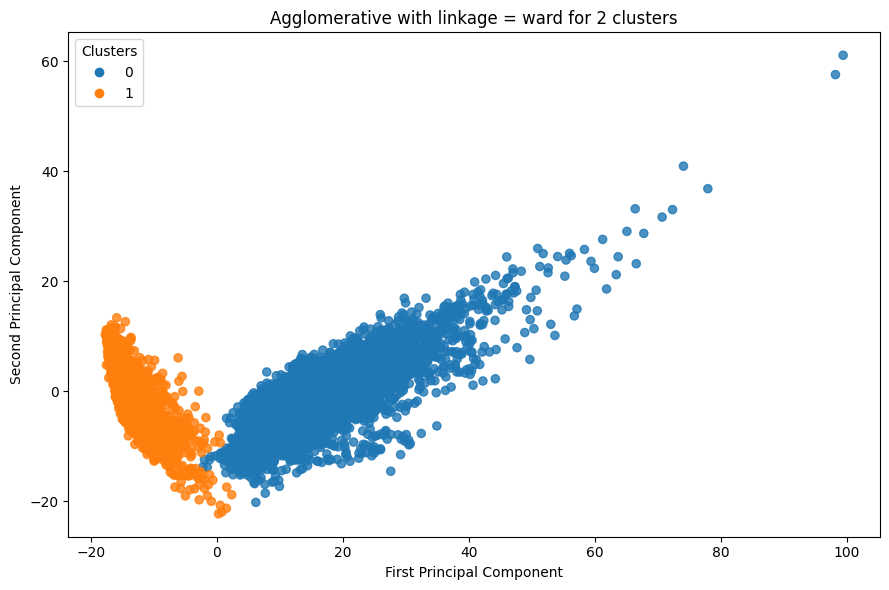

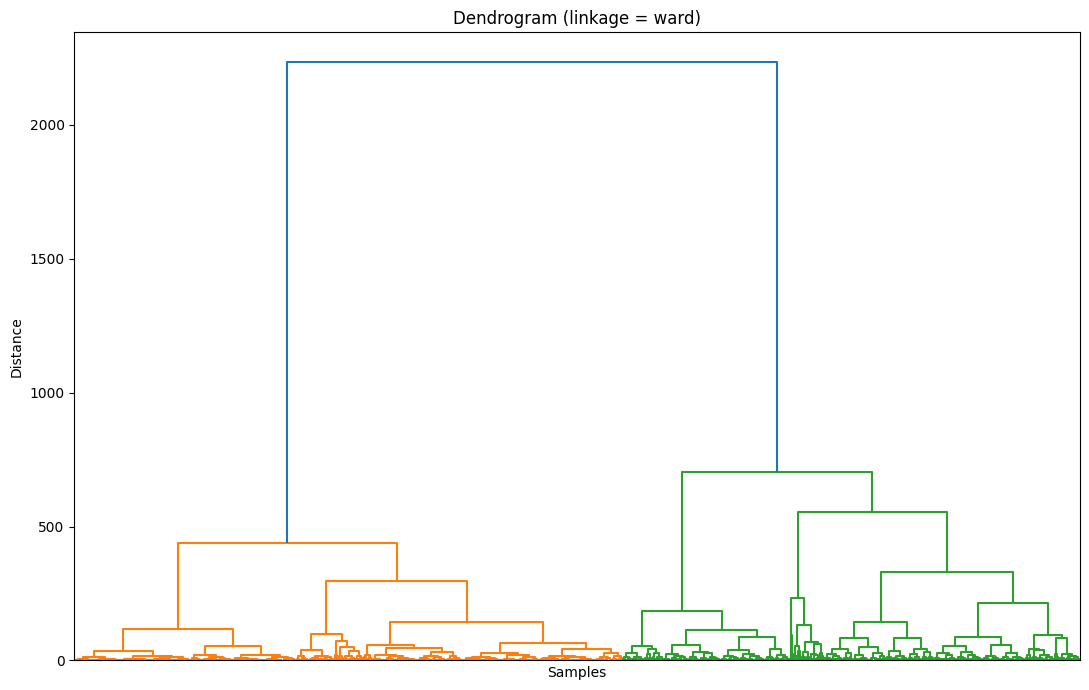

Linkage: single | clusters found: 2


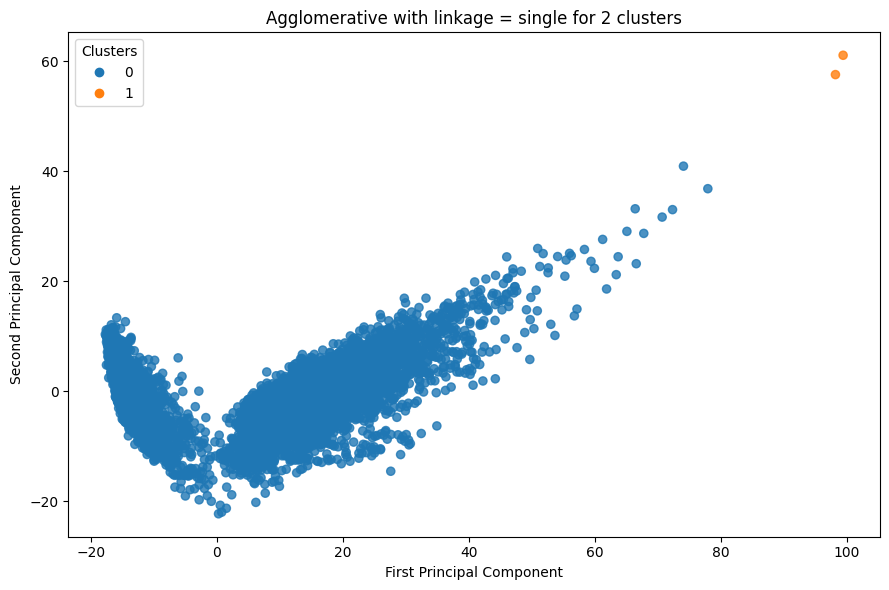

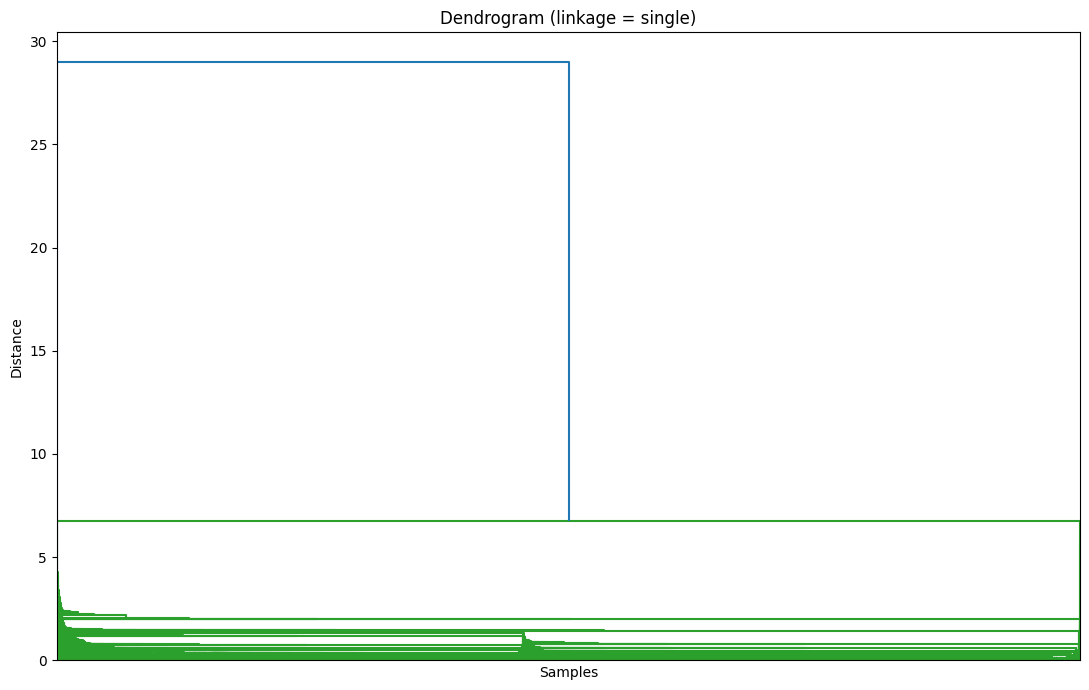

Linkage: complete | clusters found: 2


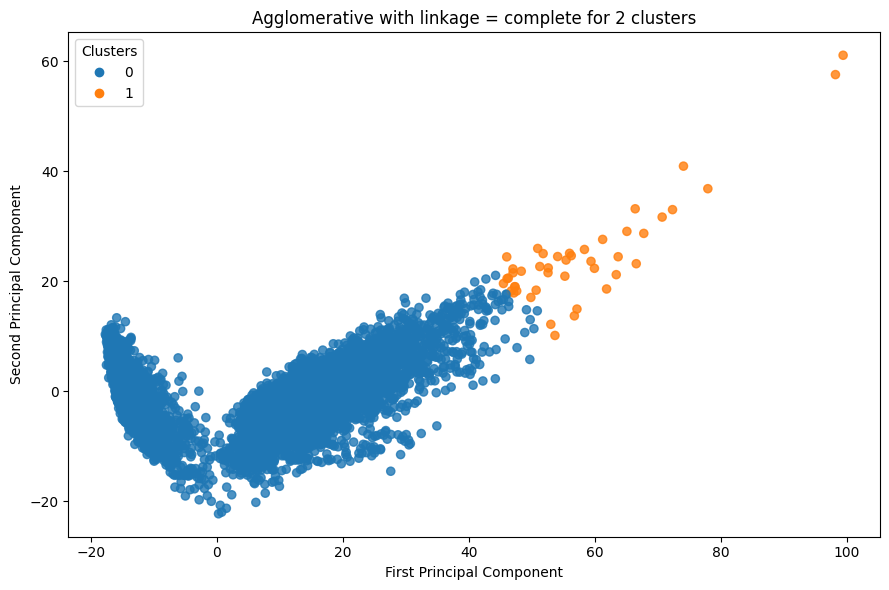

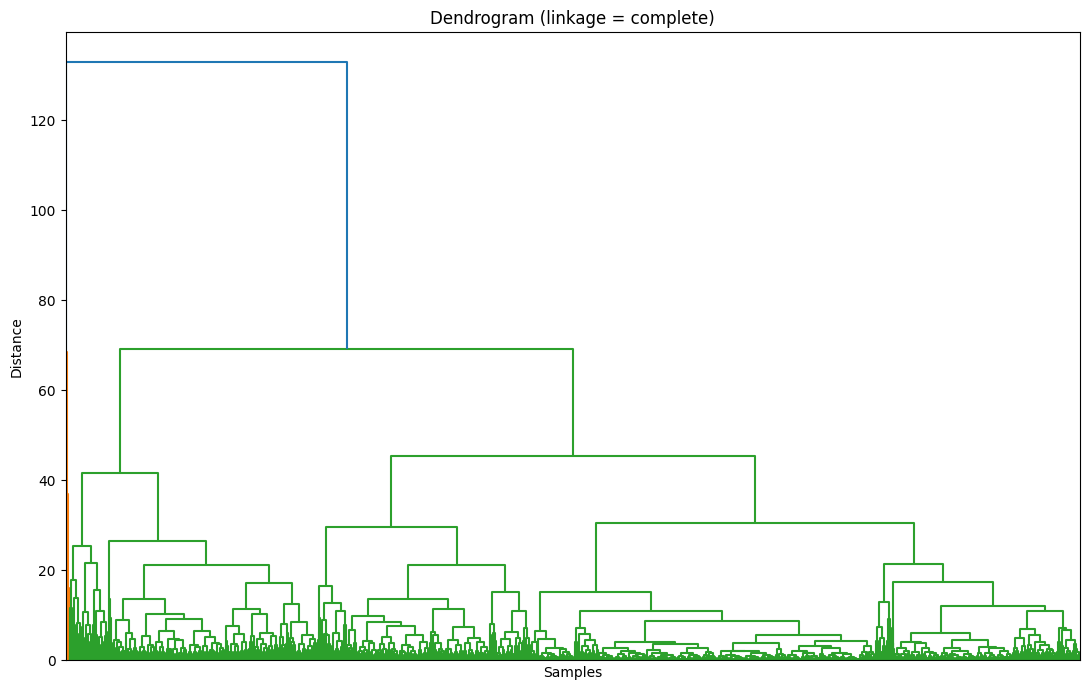

Linkage: average | clusters found: 2


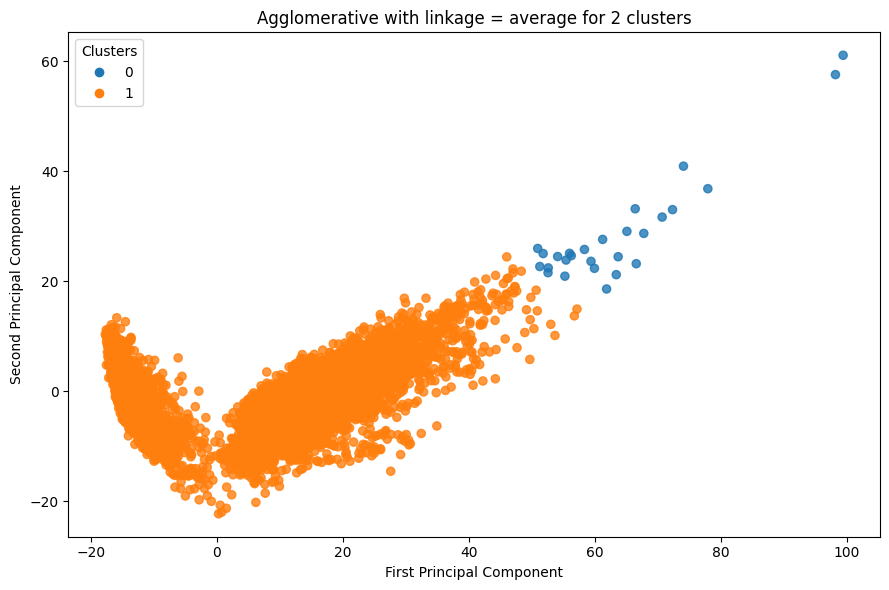

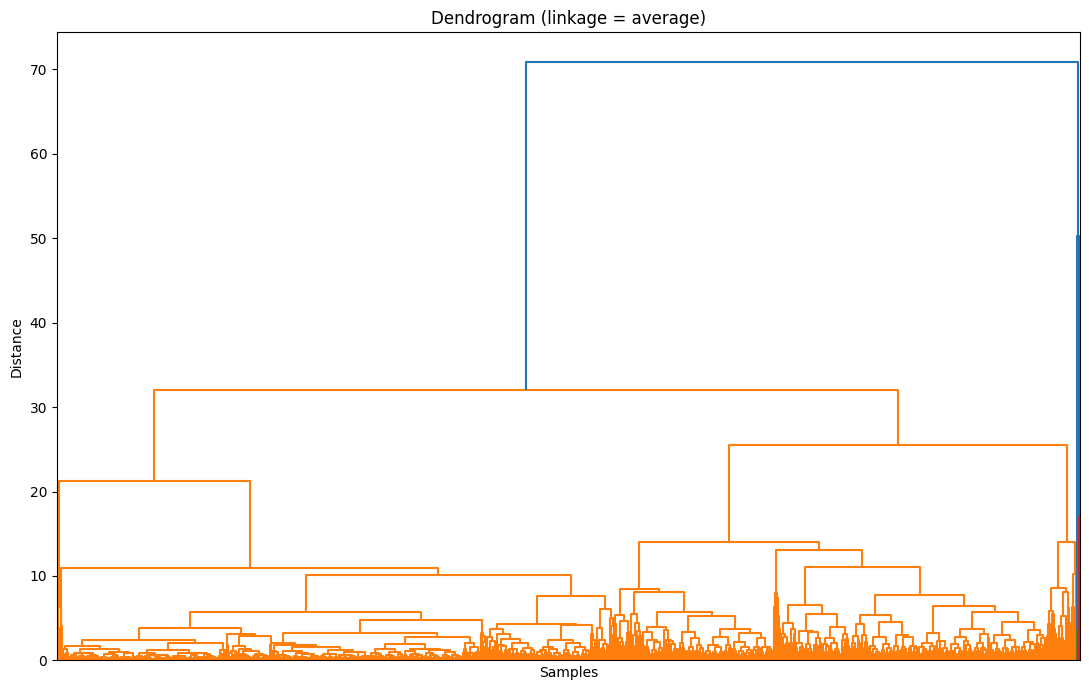

In [39]:
plot_agglomerative_clustering(X_pca, n_clusters=2)

Linkage: ward | clusters found: 6


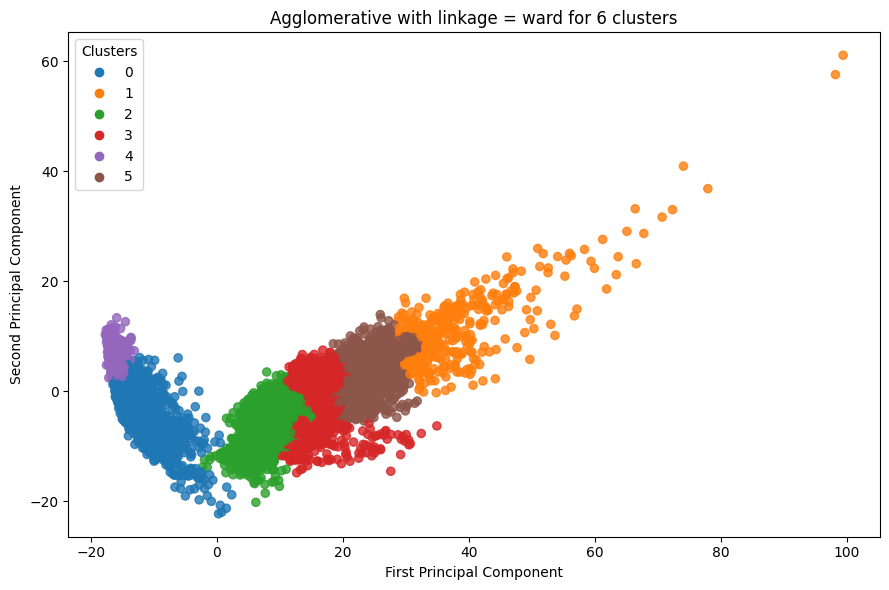

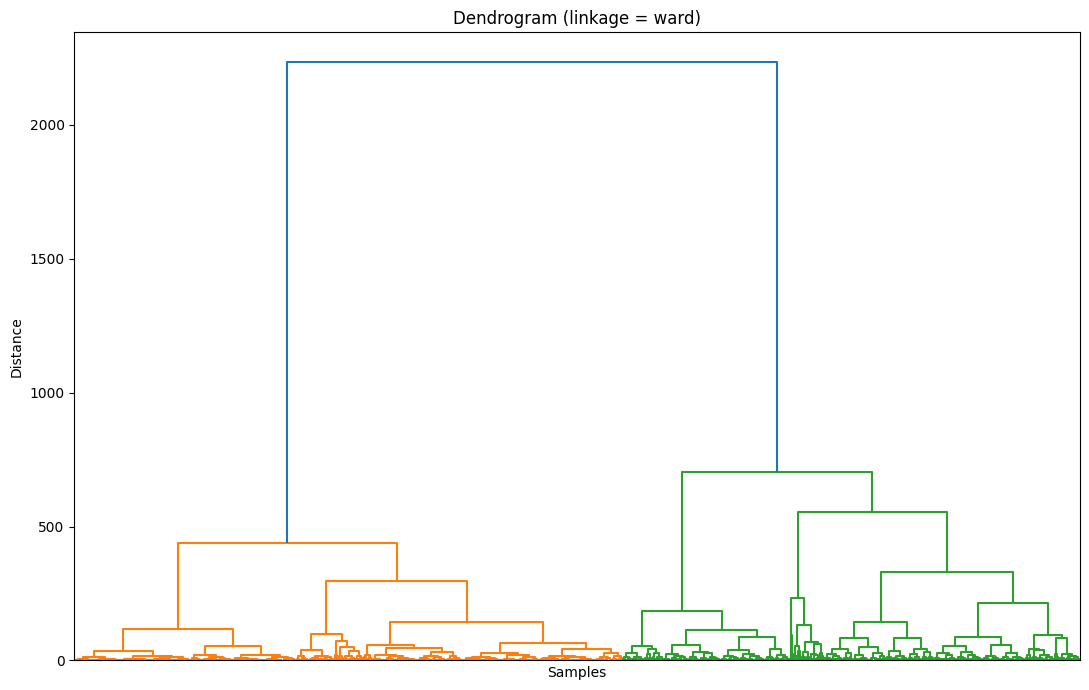

Linkage: single | clusters found: 6


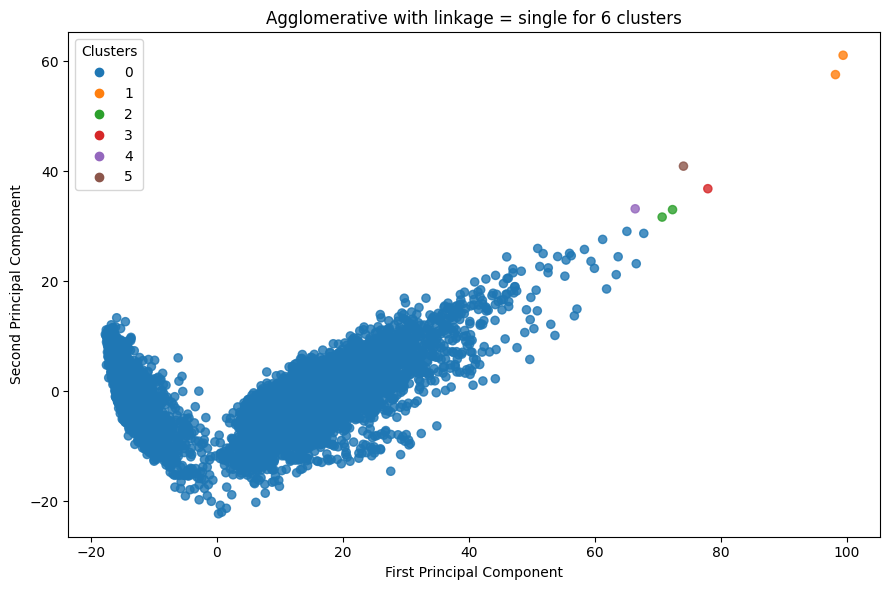

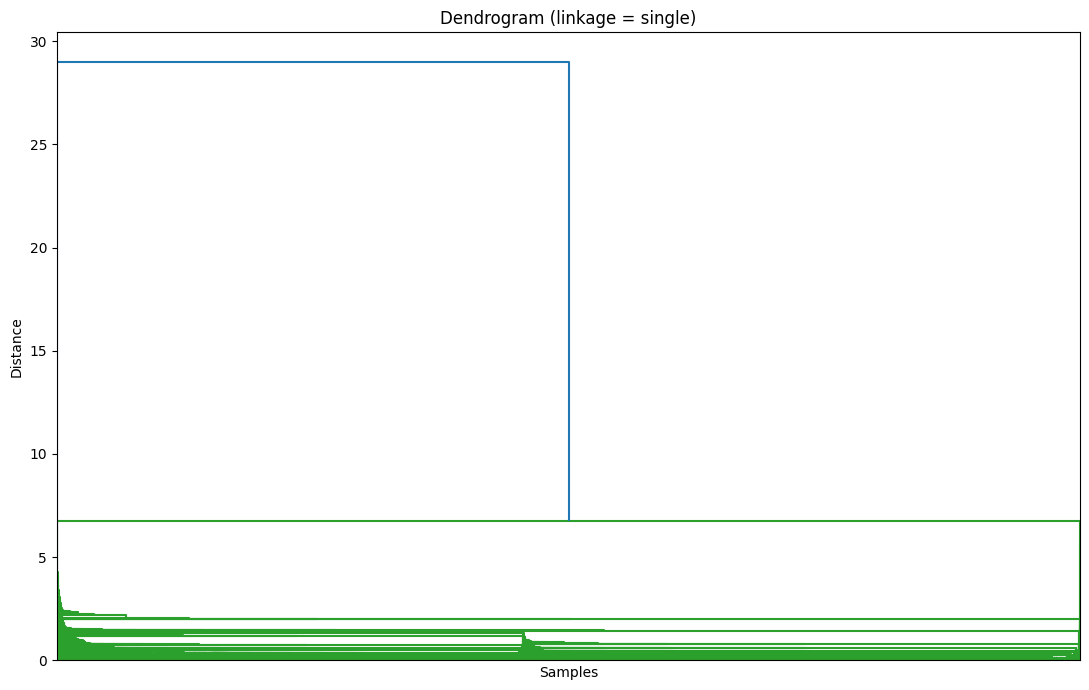

Linkage: complete | clusters found: 6


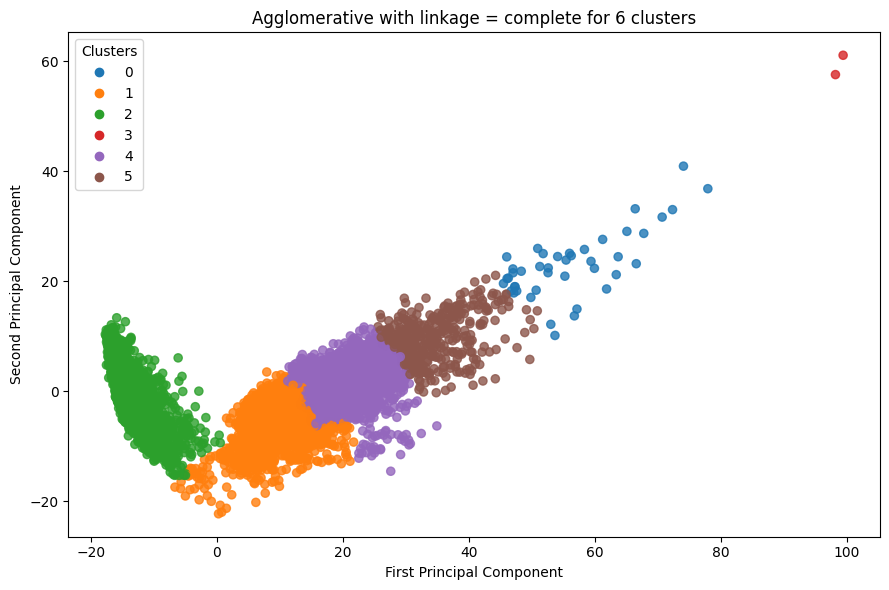

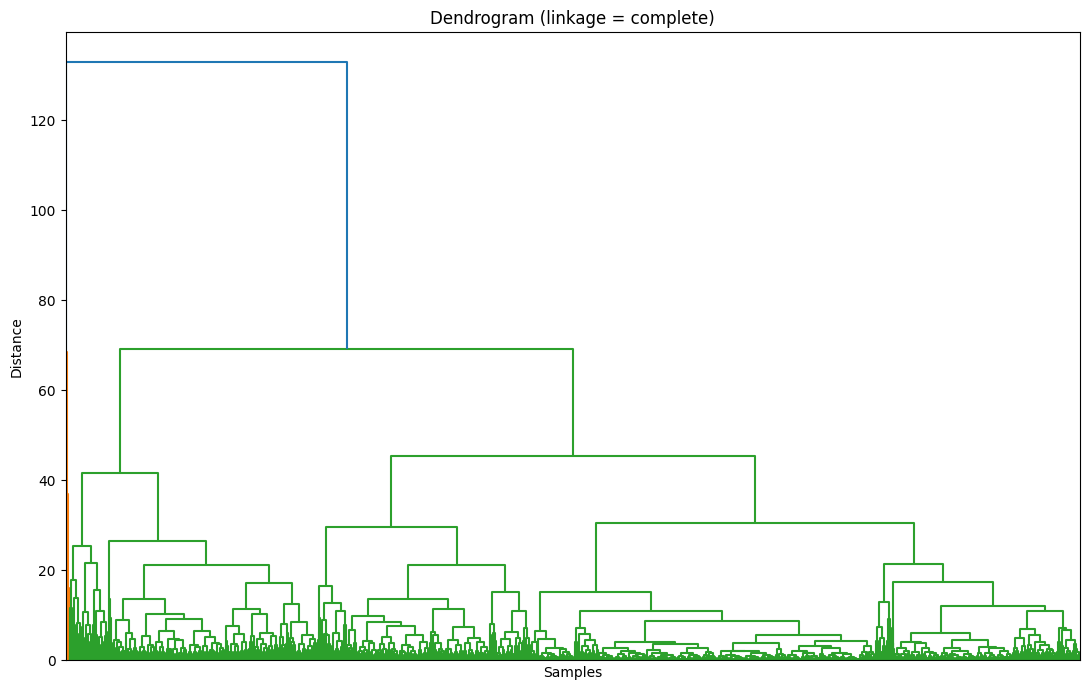

Linkage: average | clusters found: 6


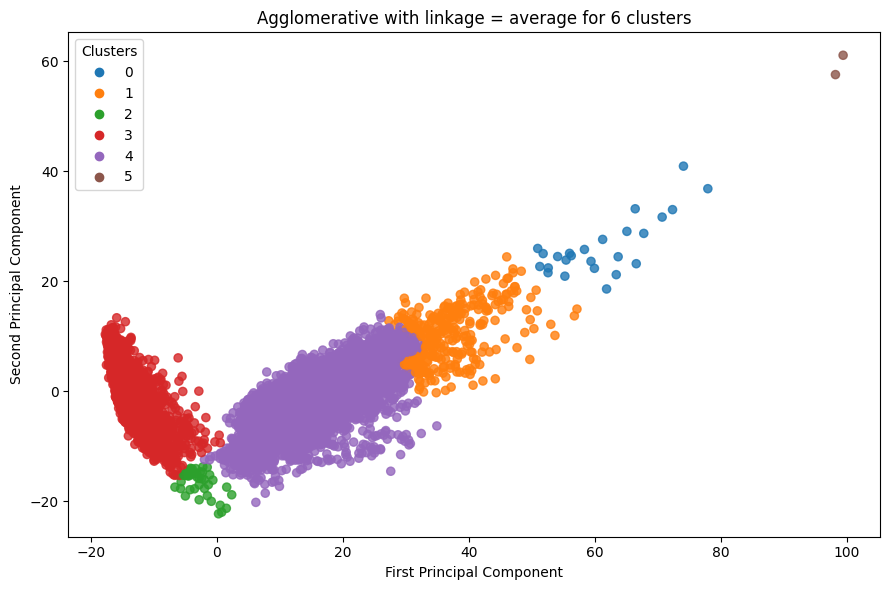

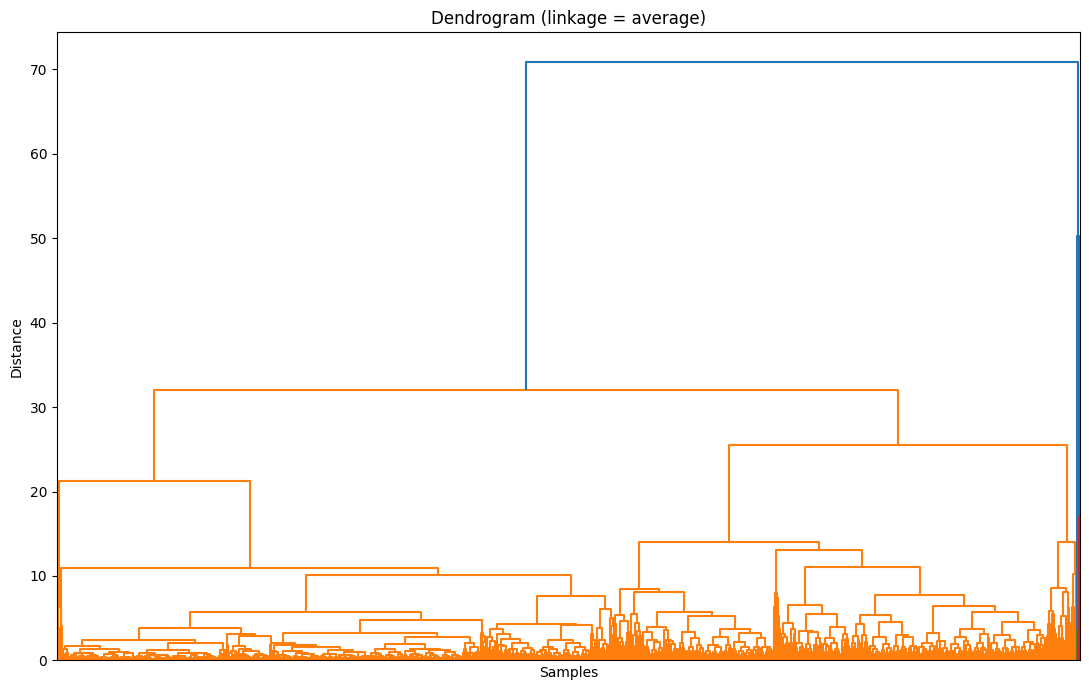

In [40]:
plot_agglomerative_clustering(X_pca, n_clusters=6)

#### Analysis of Agglomerative Clustering Results

Comparing the clustering results with the real labels from the **HAR dataset**:

##### Case with **2 clusters**
1. **Ward linkage**  
   - Clearly separates two big groups:  
     - One on the left (roughly corresponding to classes 5 and 6 – yellow and green).  
     - One on the right (classes 1–4, which appear mixed).  
   - This is the most “natural” separation in terms of variance, since Ward minimizes the within-cluster sum of squares.

2. **Single linkage**  
   - Produces a “chaining” effect: almost all points in a single cluster with a few isolated in the other.  
   - Not useful here, as it does not capture the real structure of the data.

3. **Complete linkage**  
   - Tends to isolate outliers or less dense regions.  
   - In this case, a small subset (the extreme points) ends up in a separate cluster.  
   - The separation does not reflect the original classes.

4. **Average linkage**  
   - Forms two groups, but the separation is not as clear as with Ward.  
   - Clusters are less compact, and some overlap can be seen at the boundary.

---

##### Case with **6 clusters**
1. **Ward linkage**  
   - Produces a partition that is quite consistent with the real labels (though not identical).  
   - Each cluster is compact and resembles the original classes.  
   - This is the most interpretable and consistent result.

2. **Single linkage**  
   - Again suffers from the chaining problem: one huge cluster containing almost all points, with a few isolated clusters.  
   - Not representative of the real structure.

3. **Complete linkage**  
   - Creates small, well-separated clusters, but they do not match the original classes well.  
   - Outliers are isolated, and large groups are split unnaturally.

4. **Average linkage**  
   - Gives a more balanced separation than single or complete, but less clear than Ward.  
   - Some clusters cover intermediate regions, but with noticeable overlap.

---

##### Conclusion
- **Ward linkage** is the best method for this dataset, both with 2 and 6 clusters, because:  
  - It produces compact, balanced clusters.  
  - It minimizes within-cluster variance.  
  - The results resemble the real labels most closely.  

- **Single linkage** performs very poorly (chaining effect).  
- **Complete linkage** isolates outliers into small clusters.  
- **Average linkage** gives intermediate results, acceptable but less precise than Ward.  


### Self Organizing Maps

A self-organizing map (SOM) of 9x9 neurons is created using the `MiniSom` library.
The SOM is initialized with PCA-based weights `(pca_weights_init)` and trained for 1000 iterations using the Gaussian neighborhood function.
The parameter `sigma=1.5` controls the neighborhood radius, while `learning_rate=0.5` defines the learning rate.
The SOM uses a rectangular topology and is trained with random training.

In [19]:
from minisom import MiniSom

# Initialization and training
n_neurons = 9
m_neurons = 9
som = MiniSom(n_neurons, m_neurons, X_pca.shape[1], sigma=1.5, learning_rate=.5, neighborhood_function='gaussian', random_seed=0, topology='rectangular')

som.pca_weights_init(X_pca)
som.train(X_pca, 1000, verbose=False)  # random training

/home/cbs/projects/clustering_comparison/.venv/lib/python3.10/site-packages/minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


In [25]:
unique_values = y[0].unique() 
print(unique_values.size)

6


The distance map (`distance_map()`) of the trained SOM is visualized using a colormap (`cmap='bone_r'`).  
The distance map reflects the similarity of neighboring neuron weights:  
- Light colors indicate areas of low distance (high similarity).  
- Dark colors indicate areas of high distance (cluster borders).  

Each training sample is represented with a specific marker according to its class (`target`),  
using different shapes and colors (`markers` and `colors`).  
The marker is placed at the position of the winning neuron (`som.winner(xx)`) on the SOM map.



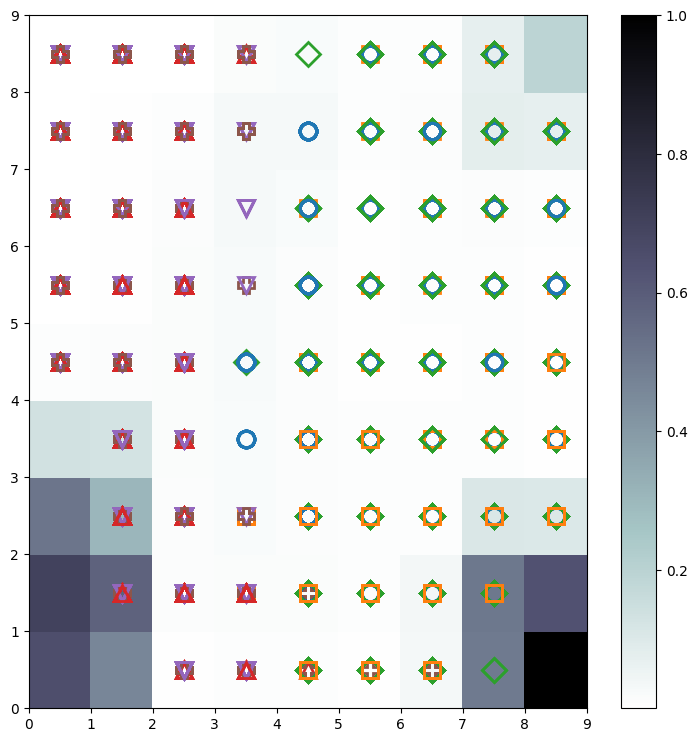

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline


target =  y.values.flatten()


plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's', 'D', '^', 'v', 'P'] 
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']  
for cnt, xx in enumerate(X_pca):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
            markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()

Interpretation:

Areas with many overlapping markers (especially in cells with a dark background) suggest a lack of clear separation between the classes in the space reduced by the SOM.
Cells containing only one type of marker indicate good clustering of that specific class.

---

Now we will display a heatmap of the activation frequencies of the neurons in the Self-Organizing Map (SOM).  
The function `som.activation_response(X_pca)` returns how many times each neuron was the winner when classifying the input data (`X_pca`).  

The heatmap (`cmap='Blues'`) shows:  
- Darker colors = Low activation.  
- Lighter colors = High activation.  



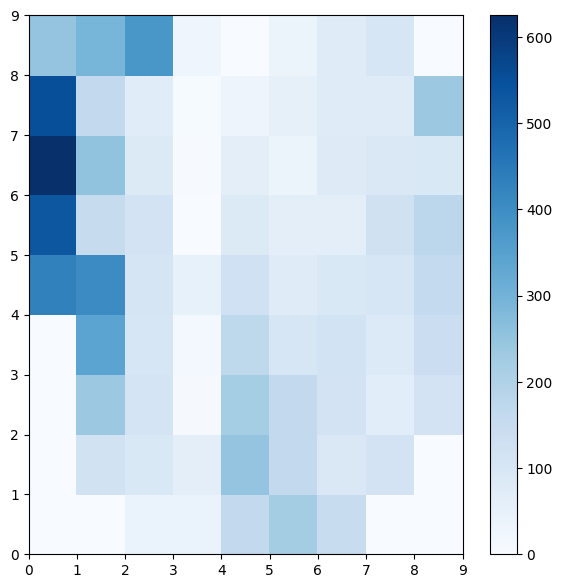

In [27]:
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(X_pca)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

---
Now we will display a heatmap of the activation frequencies of the neurons in the Self-Organizing Map (SOM).  
The function `som.activation_response(X_pca)` returns how many times each neuron was the winner when classifying the input data (`X_pca`).  

The heatmap (`cmap='Blues'`) shows:  
- Darker colors = Low activation.  
- Lighter colors = High activation.  



/tmp/ipykernel_1554/681363949.py:23: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


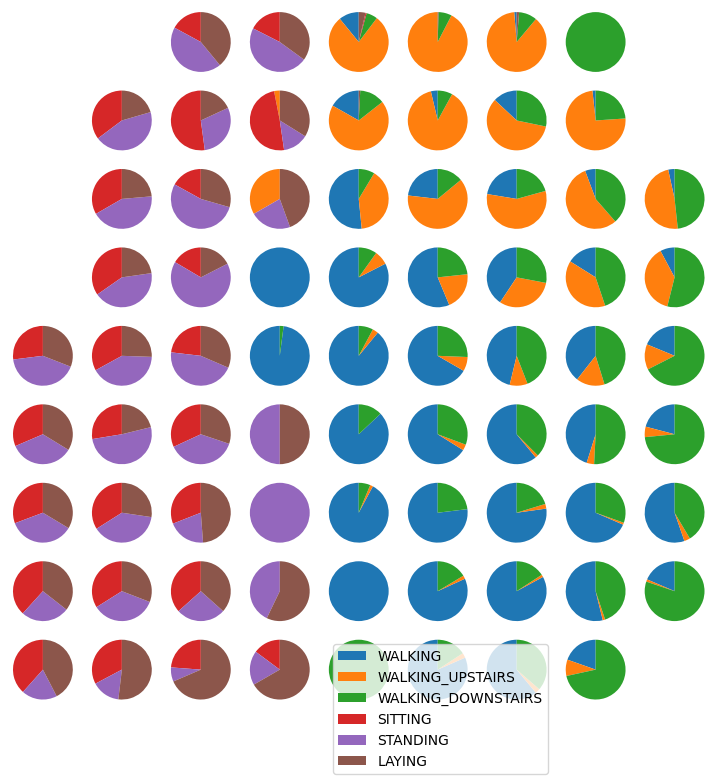

In [28]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

# Definir los nombres de las etiquetas
label_names = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 
               4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}

# Crear el mapa de etiquetas usando el SOM
labels_map = som.labels_map(X_pca, [label_names[t] for t in target])

fig = plt.figure(figsize=(9, 9))
the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)

for position, label_counts in labels_map.items():
    # Obtener las frecuencias de cada etiqueta en la celda actual
    label_fracs = [label_counts.get(label, 0) for label in label_names.values()]
    
    plt.subplot(the_grid[position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs, startangle=90)
    plt.axis('equal')

plt.legend(patches, label_names.values(), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()


The SOM with **10x10 neurons** is trained for **200 iterations**, evaluating the following metrics at each step:

1. **Quantization Error** (`quantization_error`):  
   - Measures the average distance between each data point and its winning neuron.  
   - Lower values indicate that the data is well represented by the SOM.  

2. **Topographic Error** (`topographic_error`):  
   - Indicates how many data points do not have their two closest neurons adjacent on the map.  
   - A low value suggests that the topological structure of the data is well preserved in the SOM.  

3. **Divergence Measure** (`distortion_measure`):  
   - Evaluates the distortion of the data on the map.  
   - A smaller value indicates a better organization of the SOM weights.  

The plots show the evolution of these metrics across the iterations, helping to determine whether the SOM has reached convergence or if more training is needed.


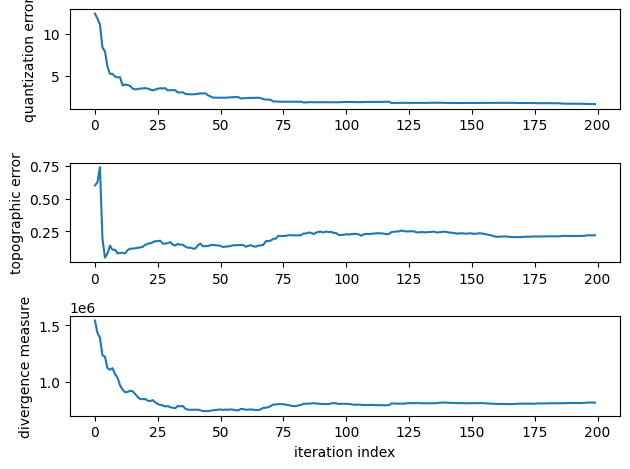

In [29]:
import numpy as np
som = MiniSom(10, 10, X_pca.shape[1], sigma=1.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

max_iter = 200
q_error = []
t_error = []
d_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(X_pca))
    som.update(X_pca[rand_i], som.winner(X_pca[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(X_pca))
    t_error.append(som.topographic_error(X_pca))
    d_error.append(som.distortion_measure(X_pca))

plt.subplot(3,1,1)
plt.plot(np.arange(max_iter), q_error)
plt.ylabel('quantization error')
plt.subplot(3,1,2)
plt.plot(np.arange(max_iter), t_error)
plt.ylabel('topographic error')
plt.subplot(3,1,3)
plt.plot(np.arange(max_iter), d_error)
plt.ylabel('divergence measure')
plt.xlabel('iteration index')
plt.tight_layout()
plt.show()